## Traffic Sign Detection Using Yolov8

In [12]:
import requests

# Download CSS file
url = "http://bit.ly/3ZLyF82"
response = requests.get(url)
with open("CSS.css", "wb") as file:
    file.write(response.content)

# Load CSS file for styling
from IPython.core.display import HTML
with open('./CSS.css', 'r') as file:
    custom_css = file.read()

HTML(custom_css)


### Install and import Toolkits

In [13]:
import os
import glob
import matplotlib.pyplot as plt
import cv2
import requests
import random 
import numpy as np
import pandas as pd
from PIL import Image
from ultralytics import YOLO
from IPython.display import Video
import warnings 
warnings.filterwarnings('ignore')

### Show Sample From Train Data

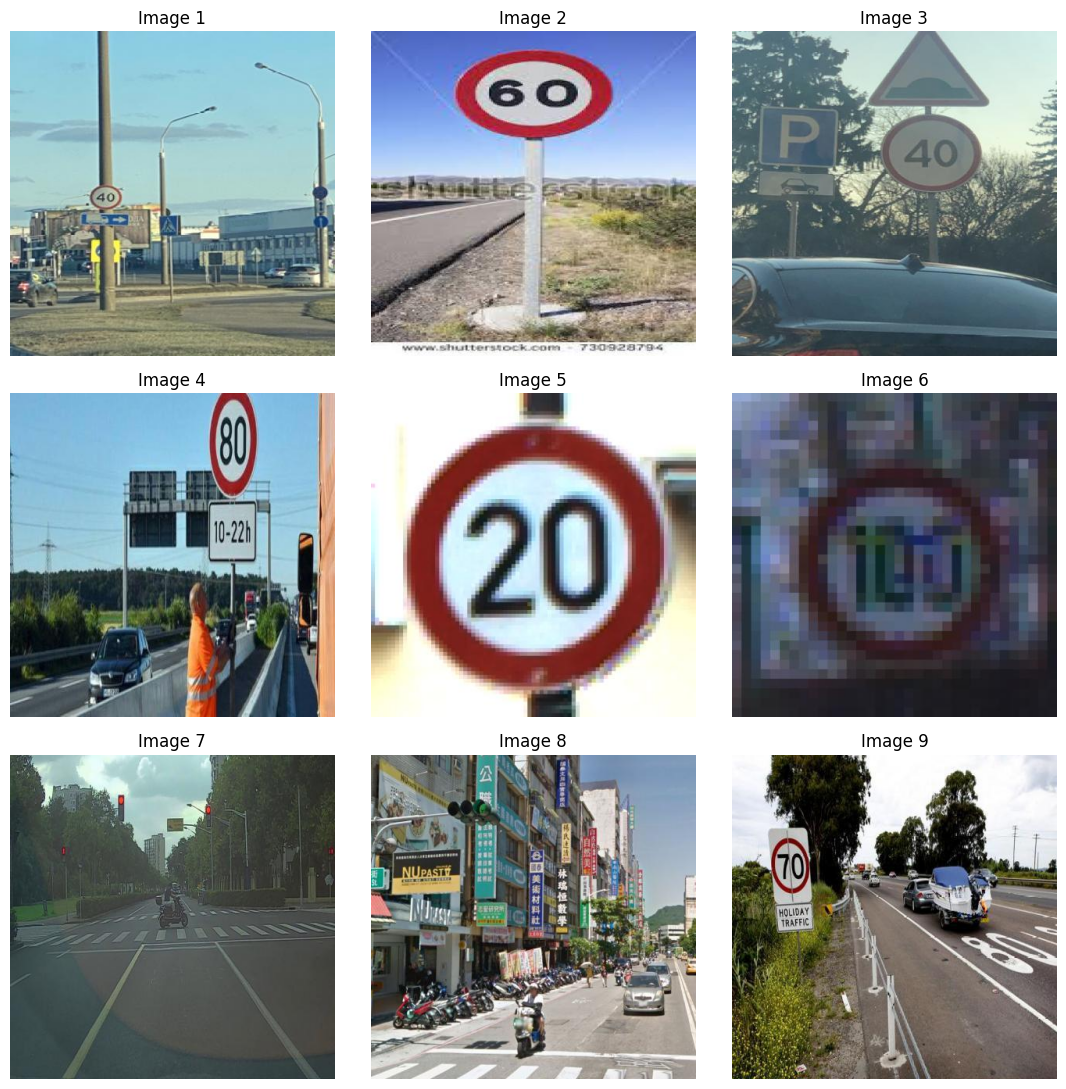

In [14]:
Image_dir = './dataset/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

#### Get The Shape Of The Image 

In [15]:
img = cv2.imread("./dataset/train/images/000000_jpg.rf.b11f308f16626f9f795a148029c46d10.jpg")
print(f"The Shape Of The Image Is: {img.shape} Which Means That We Have Dimension {img.shape[0]} Height X {img.shape[1]} Weights With 3 Channels")

The Shape Of The Image Is: (416, 416, 3) Which Means That We Have Dimension 416 Height X 416 Weights With 3 Channels


### Pre-Trained YOLOV8 For Detect Traffic Signs


image 1/1 d:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\train\images\000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg: 416x416 1 stop sign, 46.0ms
Speed: 0.9ms preprocess, 46.0ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)


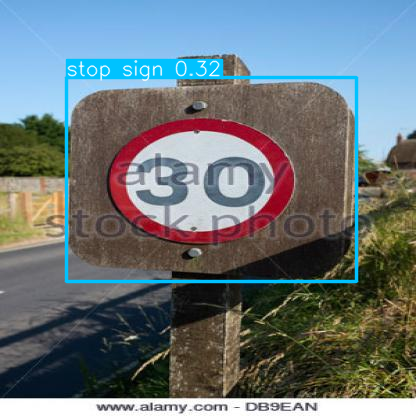

In [16]:
## Define pre-trained yolov8 model
model = YOLO("yolov8n.pt")

#predict an object
img = './dataset/train/images/000008_jpg.rf.bd6ae6db0f8c0eb727706bc322ce21ae.jpg'
pred = model.predict(source = img , imgsz = (416))
#Show the result
plot = pred[0].plot()
plot = cv2.cvtColor(plot , cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [20]:
# Build from yaml and transfer weights
final_model = YOLO("yolov8n.yaml").load("yolov8n.pt")

# Training the final model on CPU
final_model_tr = final_model.train(data="D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset/data.yaml", epochs=100, imgsz=416, batch=16, lr0=0.0001, dropout=0.25, device="cpu")


Transferred 355/355 items from pretrained weights
Ultralytics YOLOv8.1.25 🚀 Python-3.10.7 torch-1.13.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine\trainer: task=detect, mode=train, model=yolov8n.yaml, data=D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=cpu, workers=8, project=None, name=train5, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.25, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nm

  0%|          | 0.00/755k [00:00<?, ?B/s]

Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\train\labels... 3530 images, 3 backgrounds, 0 corrupt: 100%|██████████| 3530/3530 [00:06<00:00, 532.21it/s]


train: New cache created: D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\train\labels.cache


val: Scanning D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\valid\labels... 801 images, 0 backgrounds, 0 corrupt: 100%|██████████| 801/801 [00:01<00:00, 511.85it/s]

val: New cache created: D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\valid\labels.cache


Plotting labels to runs\detect\train5\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 0 dataloader workers
Logging results to runs\detect\train5
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100         0G     0.8244       3.16      1.078         20        416: 100%|██████████| 221/221 [12:07<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.68s/it]

                   all        801        944      0.241      0.494      0.224      0.182



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100         0G     0.7567      2.233      1.014         24        416: 100%|██████████| 221/221 [12:09<00:00,  3.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:13<00:00,  2.82s/it]

                   all        801        944      0.287      0.489      0.308      0.243



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100         0G     0.7383      1.947      1.008         20        416: 100%|██████████| 221/221 [12:16<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.68s/it]

                   all        801        944      0.437      0.609      0.489      0.402



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100         0G     0.7099      1.723     0.9883         22        416: 100%|██████████| 221/221 [12:13<00:00,  3.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.65s/it]

                   all        801        944      0.628      0.514      0.579      0.485



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100         0G     0.7054      1.541     0.9889         25        416: 100%|██████████| 221/221 [11:58<00:00,  3.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.68s/it]

                   all        801        944       0.63      0.649      0.662      0.555



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100         0G     0.6856      1.391     0.9819         24        416: 100%|██████████| 221/221 [11:53<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.66s/it]

                   all        801        944      0.754       0.68      0.734      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100         0G     0.6632      1.281     0.9689         21        416: 100%|██████████| 221/221 [11:54<00:00,  3.23s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.737       0.67      0.757      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100         0G     0.6637      1.193     0.9659         21        416: 100%|██████████| 221/221 [12:05<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:12<00:00,  2.79s/it]

                   all        801        944      0.754      0.732      0.777      0.667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100         0G     0.6578      1.152     0.9634         22        416: 100%|██████████| 221/221 [12:05<00:00,  3.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.65s/it]

                   all        801        944      0.848      0.715      0.804      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100         0G     0.6427      1.095     0.9626         30        416: 100%|██████████| 221/221 [11:51<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.67s/it]

                   all        801        944      0.847      0.727      0.815      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100         0G     0.6291      1.031     0.9562         17        416: 100%|██████████| 221/221 [12:02<00:00,  3.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:10<00:00,  2.71s/it]

                   all        801        944      0.835      0.756      0.823      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100         0G     0.6381      1.009     0.9535         17        416: 100%|██████████| 221/221 [14:54<00:00,  4.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.871      0.721      0.825      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100         0G     0.6289     0.9764     0.9557         31        416: 100%|██████████| 221/221 [21:52<00:00,  5.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:23<00:00,  5.51s/it]

                   all        801        944       0.92      0.768      0.859      0.732



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100         0G     0.6153     0.9398     0.9521         17        416: 100%|██████████| 221/221 [22:17<00:00,  6.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:06<00:00,  2.57s/it]

                   all        801        944      0.852       0.77      0.844      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100         0G     0.6086     0.9134     0.9432         23        416: 100%|██████████| 221/221 [22:46<00:00,  6.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:23<00:00,  5.52s/it]

                   all        801        944      0.926      0.768      0.859      0.738



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100         0G     0.6104     0.8882     0.9458         27        416: 100%|██████████| 221/221 [24:55<00:00,  6.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:23<00:00,  5.50s/it]

                   all        801        944      0.888      0.796      0.874      0.741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100         0G     0.6156     0.8692      0.946         28        416: 100%|██████████| 221/221 [18:56<00:00,  5.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:23<00:00,  5.52s/it]

                   all        801        944      0.934      0.792      0.876      0.749



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100         0G     0.6106     0.8455     0.9451         17        416: 100%|██████████| 221/221 [24:58<00:00,  6.78s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [07:54<00:00, 18.24s/it] 

                   all        801        944      0.925      0.783       0.87      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100         0G     0.6011     0.8008     0.9434         21        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.914      0.803      0.887      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100         0G     0.5928     0.8059     0.9428         20        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.929      0.814      0.884      0.752



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100         0G     0.5941     0.7942     0.9419         14        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.929      0.779      0.877      0.754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100         0G     0.5919     0.7759     0.9433         25        416: 100%|██████████| 221/221 [11:47<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.65s/it]

                   all        801        944      0.935        0.8      0.888      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100         0G     0.5877     0.7669     0.9391         16        416: 100%|██████████| 221/221 [11:47<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944       0.91      0.826      0.889      0.763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100         0G     0.5843     0.7407     0.9354         20        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944       0.94      0.822      0.894      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100         0G     0.5848      0.751     0.9383         22        416: 100%|██████████| 221/221 [11:44<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944      0.942      0.819      0.899      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100         0G     0.5739     0.7386     0.9357         21        416: 100%|██████████| 221/221 [11:50<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.942      0.812      0.886      0.758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100         0G     0.5794     0.7344      0.937         18        416: 100%|██████████| 221/221 [11:44<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.941      0.819      0.899      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100         0G     0.5696      0.716     0.9294         27        416: 100%|██████████| 221/221 [11:43<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.933        0.8      0.892      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100         0G     0.5727      0.711     0.9308         26        416: 100%|██████████| 221/221 [11:43<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944       0.96      0.826      0.907      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100         0G     0.5794     0.7075      0.937         25        416: 100%|██████████| 221/221 [11:42<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944       0.94      0.803      0.897      0.772



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100         0G     0.5696       0.71     0.9268         22        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.955      0.828      0.909      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100         0G     0.5624     0.6744      0.932         27        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944       0.95      0.829      0.906      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100         0G     0.5555     0.6732     0.9304         26        416: 100%|██████████| 221/221 [11:39<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.952      0.831      0.911      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100         0G     0.5581     0.6673     0.9296         20        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944       0.94      0.842      0.914      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100         0G     0.5625     0.6558     0.9273         29        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.954      0.841      0.915      0.789



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100         0G     0.5595     0.6593     0.9278         24        416: 100%|██████████| 221/221 [11:39<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944       0.95       0.83      0.911       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100         0G     0.5541      0.644     0.9297         19        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.943      0.833      0.907      0.781



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100         0G     0.5554     0.6438     0.9275         20        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.959      0.835      0.911      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100         0G     0.5546     0.6501     0.9259         19        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944      0.958      0.814      0.904      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100         0G     0.5433     0.6284     0.9252         21        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.952      0.842      0.912      0.785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100         0G     0.5471     0.6229     0.9225         22        416: 100%|██████████| 221/221 [11:41<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.951      0.841      0.921       0.79



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100         0G     0.5393     0.6177     0.9252         25        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.947      0.847      0.913      0.788



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100         0G     0.5449     0.6115     0.9243         18        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.917      0.859      0.921      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100         0G     0.5419     0.6122     0.9227         32        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.947      0.856      0.921      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100         0G     0.5316     0.6072     0.9237         25        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.60s/it]

                   all        801        944      0.929      0.847      0.914      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100         0G      0.537     0.5782     0.9179         30        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.948      0.836      0.919      0.798



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100         0G     0.5424     0.6071     0.9229         22        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.972      0.842      0.919      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100         0G     0.5426     0.6001      0.922         21        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.956      0.855      0.922      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100         0G     0.5403     0.5952     0.9201         22        416: 100%|██████████| 221/221 [12:14<00:00,  3.33s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.67s/it]

                   all        801        944      0.941      0.856       0.92      0.796



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100         0G     0.5327     0.5883     0.9206         22        416: 100%|██████████| 221/221 [11:50<00:00,  3.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.969      0.842      0.919      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100         0G     0.5335     0.5867     0.9224         28        416: 100%|██████████| 221/221 [11:49<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.65s/it]

                   all        801        944      0.936      0.855      0.922      0.795



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100         0G     0.5382     0.5932     0.9233         17        416: 100%|██████████| 221/221 [11:50<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.947      0.849      0.919      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100         0G     0.5187     0.5673      0.916         20        416: 100%|██████████| 221/221 [12:17<00:00,  3.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:22<00:00,  5.49s/it]

                   all        801        944      0.956      0.845      0.922      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100         0G     0.5216     0.5675     0.9159         19        416: 100%|██████████| 221/221 [18:34<00:00,  5.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:15<00:00,  5.21s/it]

                   all        801        944      0.955      0.862      0.928      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100         0G      0.521     0.5596     0.9186         15        416: 100%|██████████| 221/221 [24:50<00:00,  6.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:05<00:00,  2.52s/it]

                   all        801        944       0.95      0.854      0.923      0.803



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100         0G     0.5254       0.56     0.9164         31        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.915      0.871      0.921        0.8



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100         0G     0.5198     0.5541     0.9144         14        416: 100%|██████████| 221/221 [12:06<00:00,  3.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:11<00:00,  2.76s/it]

                   all        801        944      0.942      0.857      0.926      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100         0G     0.5202     0.5476     0.9145         25        416: 100%|██████████| 221/221 [11:44<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.955      0.847      0.919      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100         0G     0.5138      0.549     0.9151         21        416: 100%|██████████| 221/221 [11:43<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.958      0.849      0.923      0.804



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100         0G     0.5142     0.5454     0.9134         12        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.942      0.859      0.923      0.799



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100         0G     0.5208     0.5551     0.9139         19        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.957      0.846      0.922      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100         0G     0.5198     0.5374     0.9117         23        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.60s/it]

                   all        801        944       0.94      0.867      0.925      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100         0G     0.5092     0.5191     0.9127         21        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.947      0.865       0.93      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100         0G     0.5059       0.52     0.9135         27        416: 100%|██████████| 221/221 [11:39<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.942      0.879      0.931      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100         0G     0.5087     0.5326     0.9143         23        416: 100%|██████████| 221/221 [11:46<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.953      0.846      0.926      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100         0G     0.5098     0.5161     0.9101         16        416: 100%|██████████| 221/221 [11:44<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.68s/it]

                   all        801        944      0.935      0.869      0.924      0.801



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100         0G     0.5044     0.5269     0.9112         22        416: 100%|██████████| 221/221 [11:43<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.60s/it]

                   all        801        944      0.946      0.874      0.928      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100         0G     0.4948     0.4985     0.9076         21        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.949      0.877      0.933      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100         0G     0.5102     0.5202     0.9108         23        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.931      0.876      0.931      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100         0G     0.4929     0.5078     0.9083         21        416: 100%|██████████| 221/221 [11:49<00:00,  3.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944       0.96      0.859      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100         0G     0.4951     0.4929     0.9099         25        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.926      0.871       0.93      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100         0G     0.5002     0.4954     0.9087         18        416: 100%|██████████| 221/221 [11:42<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.935      0.872      0.928      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100         0G     0.4905     0.4955     0.9077         27        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.922      0.885      0.931      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100         0G     0.4939     0.4967     0.9097         21        416: 100%|██████████| 221/221 [11:45<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.59s/it]

                   all        801        944      0.934      0.856      0.926      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100         0G     0.4897     0.4965     0.9081         23        416: 100%|██████████| 221/221 [11:43<00:00,  3.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.927      0.884      0.933      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100         0G     0.4895     0.4984     0.9022         24        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.948      0.858       0.93       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100         0G     0.4818      0.486     0.9018         18        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.60s/it]

                   all        801        944      0.935      0.873       0.93      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100         0G      0.483     0.4987     0.9035         16        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.943       0.87      0.933      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100         0G     0.4837     0.4774      0.903         25        416: 100%|██████████| 221/221 [11:39<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.944      0.864      0.933      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100         0G     0.4848     0.4787     0.9014         23        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.934      0.871      0.926      0.808



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100         0G     0.4797     0.4628     0.9066         23        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.944      0.875      0.932      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         0G     0.4851     0.4639     0.9024         16        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944       0.95      0.887      0.937      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100         0G     0.4782     0.4699     0.9061         22        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.942      0.869       0.93      0.812



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100         0G     0.4815     0.4684     0.9024         27        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.65s/it]

                   all        801        944      0.941      0.862      0.929      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100         0G      0.476     0.4684     0.9014         24        416: 100%|██████████| 221/221 [11:42<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.935      0.871      0.931      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         0G     0.4677     0.4469      0.901         25        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.948      0.878      0.934      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         0G      0.466     0.4485     0.8984         24        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.60s/it]

                   all        801        944      0.949      0.879      0.937      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100         0G     0.4737     0.4583      0.901         16        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:07<00:00,  2.61s/it]

                   all        801        944      0.941      0.874      0.934      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100         0G     0.4757      0.452     0.9013         18        416: 100%|██████████| 221/221 [11:55<00:00,  3.24s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.953      0.864      0.932      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100         0G     0.4687     0.4418     0.8985         16        416: 100%|██████████| 221/221 [22:41<00:00,  6.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [02:23<00:00,  5.51s/it]

                   all        801        944      0.938      0.888      0.933      0.813


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100         0G     0.4625      0.298     0.8495         10        416: 100%|██████████| 221/221 [11:47<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:11<00:00,  2.75s/it]

                   all        801        944      0.924      0.882      0.931      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100         0G     0.4578     0.2875     0.8451         13        416: 100%|██████████| 221/221 [11:41<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.937      0.887      0.933      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100         0G     0.4537     0.2779     0.8498         12        416: 100%|██████████| 221/221 [11:41<00:00,  3.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.939      0.882      0.934      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100         0G     0.4515     0.2789     0.8498         10        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944      0.936      0.887      0.931      0.813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100         0G     0.4465     0.2741     0.8449         10        416: 100%|██████████| 221/221 [11:38<00:00,  3.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944      0.942      0.876       0.93      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100         0G     0.4472     0.2752     0.8469         11        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:09<00:00,  2.69s/it]

                   all        801        944      0.946       0.88      0.932      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100         0G     0.4453     0.2694     0.8457          9        416: 100%|██████████| 221/221 [11:41<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.62s/it]

                   all        801        944      0.949      0.876      0.932      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100         0G     0.4417     0.2665     0.8433         10        416: 100%|██████████| 221/221 [11:40<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.952      0.874      0.932      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100         0G     0.4349     0.2631     0.8445         14        416: 100%|██████████| 221/221 [11:39<00:00,  3.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.63s/it]

                   all        801        944       0.95      0.877      0.934      0.819



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100         0G     0.4357     0.2614     0.8388         13        416: 100%|██████████| 221/221 [11:46<00:00,  3.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:08<00:00,  2.64s/it]

                   all        801        944      0.945      0.881      0.934       0.82



100 epochs completed in 23.445 hours.
Optimizer stripped from runs\detect\train5\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\train5\weights\best.pt, 6.2MB

Validating runs\detect\train5\weights\best.pt...
Ultralytics YOLOv8.1.25 🚀 Python-3.10.7 torch-1.13.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 26/26 [01:01<00:00,  2.35s/it]


                   all        801        944      0.945      0.881      0.934       0.82
           Green Light        801        122      0.833      0.672      0.764      0.472
             Red Light        801        108       0.84      0.633      0.742      0.454
       Speed Limit 100        801         52      0.947      0.942       0.98      0.892
       Speed Limit 110        801         17      0.894      0.882      0.916      0.857
       Speed Limit 120        801         60      0.951      0.972      0.992      0.916
        Speed Limit 20        801         56          1      0.976      0.987      0.882
        Speed Limit 30        801         74      0.972      0.949       0.98      0.924
        Speed Limit 40        801         55      0.954      0.945      0.985      0.886
        Speed Limit 50        801         71      0.992      0.859      0.953      0.844
        Speed Limit 60        801         76      0.946      0.908      0.957      0.878
        Speed Limit 7

### Validation

In [61]:
metrics = ["P_curve.png" , "R_curve.png" , "confusion_matrix.png"]

In [ ]:
for i in metrics:
    img = cv2.imread(f'/runs/detect/train5/{i}')
    
    plt.figure(figsize= (15 , 12))
    
    plt.imshow(img)
    
    plt.show()

In [64]:
model_info = pd.read_csv("./runs/detect/train5/results.csv")
model_info.tail(10)

epoch           train/box_loss           train/cls_loss  \
90                       91                  0.46253                  0.29798   
91                       92                  0.45780                  0.28750   
92                       93                  0.45371                  0.27791   
93                       94                  0.45154                  0.27889   
94                       95                  0.44652                  0.27410   
95                       96                  0.44720                  0.27516   
96                       97                  0.44530                  0.26936   
97                       98                  0.44171                  0.26648   
98                       99                  0.43490                  0.26309   
99                      100                  0.43568                  0.26143   

             train/dfl_loss     metrics/precision(B)        metrics/recall(B)  \
90                  0.84949                  0.92421                  0.88153   
91                  0.84506                  0.93716                  0.88665   
92                  0.84979                  0.93867                  0.88166   
93                  0.84982                  0.93592                  0.88679   
94                  0.84492                  0.94212                  0.87630   
95                  0.84693                  0.94639                  0.88009   
96                  0.84565                  0.94851                  0.87550   
97                  0.84329                  0.95202                  0.87354   
98                  0.84453                  0.95003                  0.87688   
99                  0.83885                  0.94491                  0.88117   

           metrics/mAP50(B)      metrics/mAP50-95(B)             val/box_loss  \
90                  0.93094                  0.81482                  0.55256   
91                  0.93292                  0.81411                  0.55518   
92                  0.93402                  0.81453                  0.55433   
93                  0.93129                  0.81302                  0.55183   
94                  0.93035                  0.81407                  0.55083   
95                  0.93236                  0.81592                  0.55118   
96                  0.93231                  0.81452                  0.55040   
97                  0.93166                  0.81684                  0.55039   
98                  0.93436                  0.81860                  0.55077   
99                  0.93372                  0.81976                  0.54882   

               val/cls_loss             val/dfl_loss                   lr/pg0  \
90                  0.32611                  0.87831                 0.000063   
91                  0.32329                  0.88027                 0.000057   
92                  0.31944                  0.88272                 0.000052   
93                  0.32052                  0.87857                 0.000047   
94                  0.31839                  0.87996                 0.000042   
95                  0.31450                  0.88000                 0.000037   
96                  0.31352                  0.88035                 0.000031   
97                  0.31367                  0.87955                 0.000026   
98                  0.31657                  0.87978                 0.000021   
99                  0.31385                  0.87921                 0.000016   

                     lr/pg1                   lr/pg2  
90                 0.000063                 0.000063  
91                 0.000057                 0.000057  
92                 0.000052                 0.000052  
93                 0.000047                 0.000047  
94                 0.000042                 0.000042  
95                 0.000037                 0.000037  
96                 0.000031                 0.000031  
97            

## Validation of the model By TestSet

In [65]:
# Loading the best performing model
valid_model = YOLO("./runs/detect/train5/weights/best.pt")

# Evaluating on the test set
metrics = valid_model.val(split = 'test')

Ultralytics YOLOv8.1.25 🚀 Python-3.10.7 torch-1.13.1+cpu CPU (11th Gen Intel Core(TM) i7-1165G7 2.80GHz)
YOLOv8n summary (fused): 168 layers, 3008573 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\test\labels.cache... 638 images, 1 backgrounds, 0 corrupt: 100%|██████████| 638/638 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 40/40 [00:39<00:00,  1.01it/s]


                   all        638        770      0.897      0.892      0.927        0.8
           Green Light        638        110      0.889      0.802      0.882      0.525
             Red Light        638         94      0.792      0.681      0.708      0.456
        Speed Limit 10        638          3      0.736          1      0.913       0.73
       Speed Limit 100        638         46        0.9      0.935      0.983      0.879
       Speed Limit 110        638         21      0.949      0.714      0.838      0.729
       Speed Limit 120        638         44      0.857      0.956      0.973      0.888
        Speed Limit 20        638         46      0.947      0.957       0.97      0.906
        Speed Limit 30        638         60      0.947      0.896       0.95      0.881
        Speed Limit 40        638         53      0.911      0.962      0.972      0.863
        Speed Limit 50        638         50      0.797       0.84      0.894      0.812
        Speed Limit 6

In [66]:
#Final Result
print("precision(B): ", metrics.results_dict['metrics/precision(B)'])
print("recall(B): ", metrics.results_dict['metrics/recall(B)'])
print("mAP50(B): ", metrics.results_dict['metrics/mAP50(B)'])
print("mAP50-95(B): ", metrics.results_dict['metrics/precision(B)'])

precision(B):  0.8970161399294444
recall(B):  0.8924283097421672
mAP50(B):  0.9269367911074472
mAP50-95(B):  0.8970161399294444


### Prediction On Test Images

In [73]:
test_dir = r"D:\SPARK\MACHINE LEARNING\TRAFFIC_SIGN_DETECTION\dataset\test\images"

files = [os.path.join(test_dir , file) for file in os.listdir(test_dir) if file.endswith('.jpg')]

random_imgs = random.sample(files , k=10)
for img in random_imgs:
    img = cv2.imread(img)
    results = final_model.predict([img] , save= True , imgsz = 416 , conf = 0.5 , iou = 0.7)


0: 416x416 1 Stop, 61.6ms
Speed: 2.1ms preprocess, 61.6ms inference, 1.2ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train52

0: 416x416 1 Speed Limit 70, 52.3ms
Speed: 1.0ms preprocess, 52.3ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train53

0: 416x416 1 Speed Limit 80, 52.1ms
Speed: 0.0ms preprocess, 52.1ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train54

0: 416x416 1 Speed Limit 80, 54.6ms
Speed: 1.0ms preprocess, 54.6ms inference, 1.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train55

0: 416x416 1 Speed Limit 120, 46.1ms
Speed: 1.0ms preprocess, 46.1ms inference, 0.0ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\detect\train56

0: 416x416 1 Green Light, 50.3ms
Speed: 1.0ms preprocess, 50.3ms inference, 1.4ms postprocess per image at shape (1, 3, 416, 416)
Results saved to runs\d

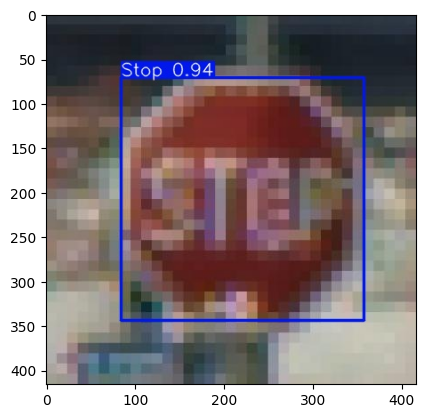

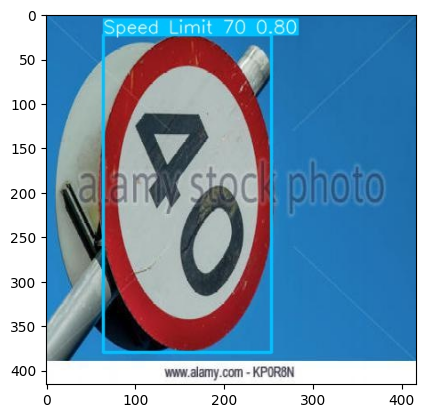

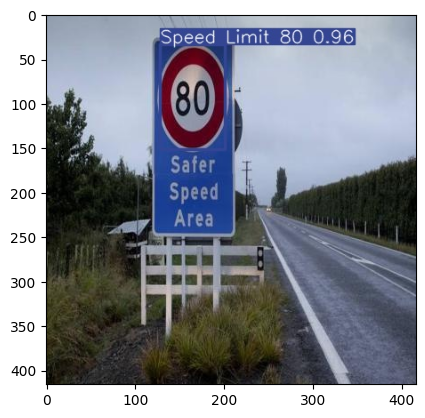

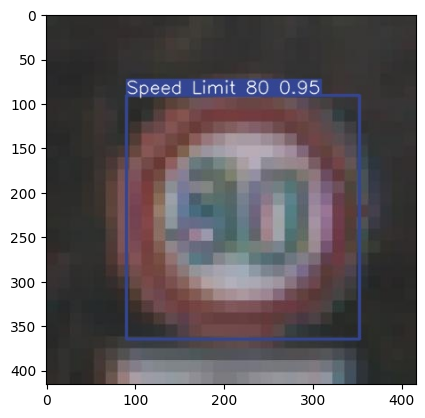

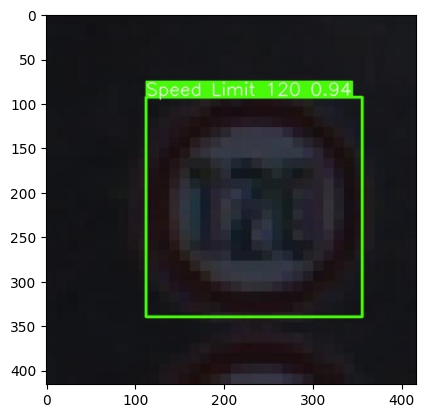

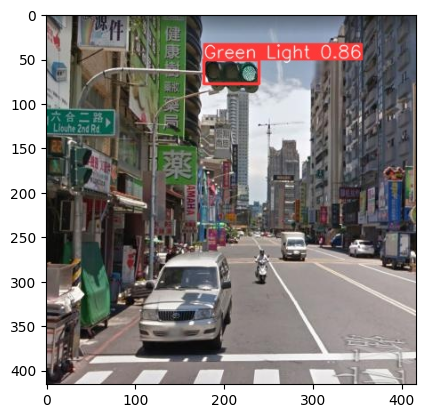

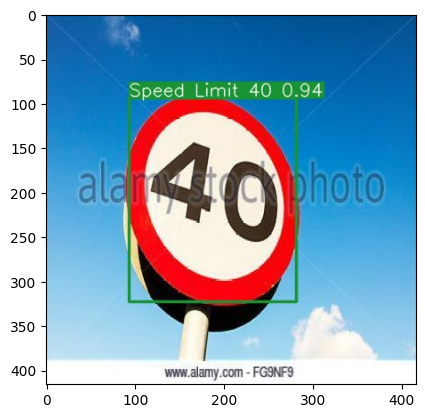

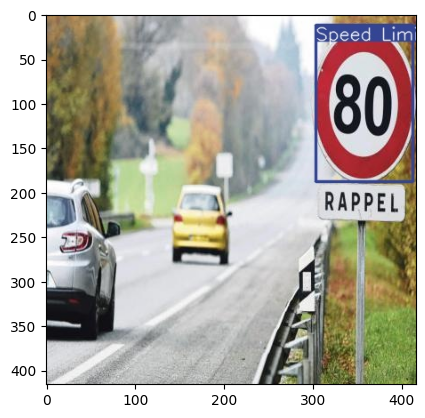

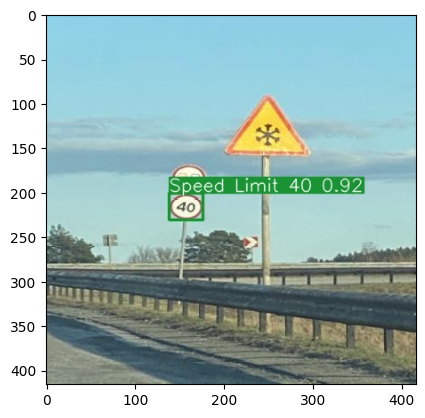

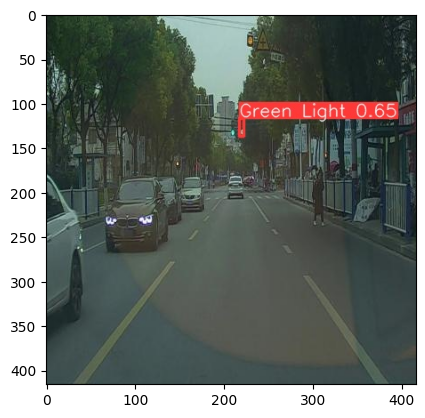

In [83]:
for i in range(2,12):
    plt.imshow(plt.imread(f"./runs/detect/train5{i}/image0.jpg"))
    plt.show()